In [44]:
import numpy as np

In [45]:
import pandas as pd

In [46]:
from keras.models import model_from_json

In [47]:
n=pd.read_csv('rainfall.csv')

In [48]:
n['District']=n['District'].str.lower()

In [49]:
n

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,vlookup
0,Andaman & Nicobar Islands,andaman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andaman & Nicobar IslandsAndaman
1,Andaman & Nicobar Islands,nicobar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andaman & Nicobar IslandsNicobar
2,Andhra Pradesh,adilabad,1901.0,6.725,10.488,23.288,35.560,23.119,115.546,294.119,276.865,181.615,47.310,1.339,0.000,Andhra PradeshAdilabad
3,Andhra Pradesh,adilabad,1902.0,0.420,0.000,0.388,6.070,3.331,45.960,233.973,167.971,198.177,26.447,35.083,11.222,Andhra PradeshAdilabad
4,Andhra Pradesh,adilabad,1903.0,6.643,1.956,0.173,4.551,33.348,132.078,436.611,334.544,226.037,138.818,14.095,8.823,Andhra PradeshAdilabad
5,Andhra Pradesh,adilabad,1904.0,0.054,0.121,11.446,0.017,16.900,131.048,160.694,81.865,251.577,110.391,0.146,0.130,Andhra PradeshAdilabad
6,Andhra Pradesh,adilabad,1905.0,0.589,2.293,8.252,35.020,17.569,79.937,96.331,313.522,361.697,4.950,0.146,0.000,Andhra PradeshAdilabad
7,Andhra Pradesh,adilabad,1906.0,4.369,1.967,9.703,0.326,2.983,221.619,279.633,189.606,132.764,11.557,23.836,6.166,Andhra PradeshAdilabad
8,Andhra Pradesh,adilabad,1907.0,0.921,2.758,2.275,27.166,0.537,141.804,221.362,301.701,83.428,0.735,4.585,3.344,Andhra PradeshAdilabad
9,Andhra Pradesh,adilabad,1908.0,2.478,5.536,3.840,3.644,8.194,100.301,271.800,333.651,364.372,0.715,0.146,0.036,Andhra PradeshAdilabad


In [50]:
temp=pd.read_excel('temp.xls')

In [81]:
n.shape
n=n.dropna()
l1=n[n.District=='Aurangabad'].index
l3=n[n.District=='aurangabad'].index
l2=n[n.District=='hamirpur'].index
n=n.drop(l1)
n=n.drop(l2)
n=n.drop(l3)

In [82]:
n['District'].unique()


array(['adilabad', 'anantapur', 'chittoor', 'cuddapah', 'east godavari',
       'guntur', 'hyderabad', 'karimnagar', 'khammam', 'krishna',
       'kurnool', 'mahbubnagar', 'medak', 'nalgonda', 'nellore',
       'nizamabad', 'prakasam', 'rangareddi', 'srikakulam',
       'vishakhapatnam', 'vizianagaram', 'warangal', 'west godavari',
       'changlang', 'dibang valley', 'east kameng', 'east siang', 'lohit',
       'lower subansiri', 'tawang', 'tirap', 'upper subansiri',
       'west kameng', 'west siang', 'barpeta', 'cachar', 'darrang',
       'dhemaji', 'dhubri', 'dibrugarh', 'golaghat', 'golapara',
       'hailakandi', 'jorhat', 'kamrup', 'karbi anglong', 'karimganj',
       'kokrajhar', 'lakhimpur', 'nagaon', 'nalbari',
       'north cachar hills', 'sibsagar', 'sonitpur', 'tinsukia', 'araria',
       'banka', 'begusarai', 'bhagalpur', 'bhojpur', 'buxar', 'darbhanga',
       'gaya', 'gopalganj', 'jamui', 'jehanabad', 'kaimur', 'katihar',
       'khagaria', 'kishanganj', 'lakhisarai', '

In [83]:
districts=n['District'].unique()

dict1={}

In [84]:
for i in districts:
    dict1[i]={}
dict1

{'adilabad': {},
 'anantapur': {},
 'chittoor': {},
 'cuddapah': {},
 'east godavari': {},
 'guntur': {},
 'hyderabad': {},
 'karimnagar': {},
 'khammam': {},
 'krishna': {},
 'kurnool': {},
 'mahbubnagar': {},
 'medak': {},
 'nalgonda': {},
 'nellore': {},
 'nizamabad': {},
 'prakasam': {},
 'rangareddi': {},
 'srikakulam': {},
 'vishakhapatnam': {},
 'vizianagaram': {},
 'warangal': {},
 'west godavari': {},
 'changlang': {},
 'dibang valley': {},
 'east kameng': {},
 'east siang': {},
 'lohit': {},
 'lower subansiri': {},
 'tawang': {},
 'tirap': {},
 'upper subansiri': {},
 'west kameng': {},
 'west siang': {},
 'barpeta': {},
 'cachar': {},
 'darrang': {},
 'dhemaji': {},
 'dhubri': {},
 'dibrugarh': {},
 'golaghat': {},
 'golapara': {},
 'hailakandi': {},
 'jorhat': {},
 'kamrup': {},
 'karbi anglong': {},
 'karimganj': {},
 'kokrajhar': {},
 'lakhimpur': {},
 'nagaon': {},
 'nalbari': {},
 'north cachar hills': {},
 'sibsagar': {},
 'sonitpur': {},
 'tinsukia': {},
 'araria': {}

In [85]:
districts.shape

(537,)

In [86]:
l=n['District']


In [87]:
l.unique()

array(['adilabad', 'anantapur', 'chittoor', 'cuddapah', 'east godavari',
       'guntur', 'hyderabad', 'karimnagar', 'khammam', 'krishna',
       'kurnool', 'mahbubnagar', 'medak', 'nalgonda', 'nellore',
       'nizamabad', 'prakasam', 'rangareddi', 'srikakulam',
       'vishakhapatnam', 'vizianagaram', 'warangal', 'west godavari',
       'changlang', 'dibang valley', 'east kameng', 'east siang', 'lohit',
       'lower subansiri', 'tawang', 'tirap', 'upper subansiri',
       'west kameng', 'west siang', 'barpeta', 'cachar', 'darrang',
       'dhemaji', 'dhubri', 'dibrugarh', 'golaghat', 'golapara',
       'hailakandi', 'jorhat', 'kamrup', 'karbi anglong', 'karimganj',
       'kokrajhar', 'lakhimpur', 'nagaon', 'nalbari',
       'north cachar hills', 'sibsagar', 'sonitpur', 'tinsukia', 'araria',
       'banka', 'begusarai', 'bhagalpur', 'bhojpur', 'buxar', 'darbhanga',
       'gaya', 'gopalganj', 'jamui', 'jehanabad', 'kaimur', 'katihar',
       'khagaria', 'kishanganj', 'lakhisarai', '

In [88]:
n.shape
p=n.iloc[0]


In [89]:
i=0
j=0
while(i<n.shape[0] and j<537):
    print(n.iloc[i]['District']," ",districts[j])
    while(n.iloc[i]['District']==districts[j]):
        l1=[]
        p=n.iloc[i]
        
        p=p.drop(['State','District','Year','vlookup'])
        p=np.array(p)
        li=p
        
        dict1[districts[j]][int(n.iloc[i]['Year'])]=p
        i+=1
    j+=1


adilabad   adilabad
anantapur   anantapur
chittoor   chittoor
cuddapah   cuddapah
east godavari   east godavari
guntur   guntur
hyderabad   hyderabad
karimnagar   karimnagar
khammam   khammam
krishna   krishna
kurnool   kurnool
mahbubnagar   mahbubnagar
medak   medak
nalgonda   nalgonda
nellore   nellore
nizamabad   nizamabad
prakasam   prakasam
rangareddi   rangareddi
srikakulam   srikakulam
vishakhapatnam   vishakhapatnam
vizianagaram   vizianagaram
warangal   warangal
west godavari   west godavari
changlang   changlang
dibang valley   dibang valley
east kameng   east kameng
east siang   east siang
lohit   lohit
lower subansiri   lower subansiri
tawang   tawang
tirap   tirap
upper subansiri   upper subansiri
west kameng   west kameng
west siang   west siang
barpeta   barpeta
cachar   cachar
darrang   darrang
dhemaji   dhemaji
dhubri   dhubri
dibrugarh   dibrugarh
golaghat   golaghat
golapara   golapara
hailakandi   hailakandi
jorhat   jorhat
kamrup   kamrup
karbi anglong   karbi angl

ramanathapuram   ramanathapuram
salem   salem
sivaganga   sivaganga
thanjavur   thanjavur
the nilgiris   the nilgiris
theni   theni
thiruvallur   thiruvallur
thiruvarur   thiruvarur
thoothukkudi   thoothukkudi
tiruchirapalli   tiruchirapalli
tirunelveli   tirunelveli
tiruvannamalai   tiruvannamalai
vellore   vellore
viluppuram   viluppuram
virudhunagar   virudhunagar
dhalai   dhalai
north tripura   north tripura
south tripura   south tripura
west tripura   west tripura
agra   agra
aligarh   aligarh
allahabad   allahabad
ambedkar nagar   ambedkar nagar
auraiya   auraiya
azamgarh   azamgarh
baghpat   baghpat
bahraich   bahraich
ballia   ballia
balrampur   balrampur
banda   banda
barabanki   barabanki
bareilly   bareilly
basti   basti
bijnor   bijnor
budaun   budaun
bulandshahar   bulandshahar
chandauli   chandauli
chitrakoot   chitrakoot
deoria   deoria
etah   etah
etawah   etawah
faizabad   faizabad
farrukhabad   farrukhabad
fatehpur   fatehpur
firozabad   firozabad
gautam buddha nagar 

IndexError: single positional indexer is out-of-bounds

In [26]:
# i=7888
# int(n.iloc[i]['Year'])

In [90]:
# func to save and load file to reduce processing time
import pickle
def save(dictionary, name):
    with open(name, 'wb') as fp:
        pickle.dump(dictionary, fp, protocol=pickle.HIGHEST_PROTOCOL)

# func to load:
def load(name):
    with open(name, 'rb') as fp:
        data = pickle.load(fp)
        return data

In [91]:
save(dict1,"dictloaded")


In [92]:
dictloaded=load("dictloaded")

dictloaded

In [ ]:
# p=n.iloc[3]

In [ ]:
# n.iloc[0][15]

In [ ]:
# p=p.drop(['State','District','Year','vlookup'])

In [ ]:
# p=np.array(p)

In [ ]:
# li=[]

In [ ]:
# li=p

In [ ]:
# dicttemp={}

In [ ]:
# dicttemp[0]=p

In [ ]:

# dicttemp[0]

In [95]:
len(dict1['adilabad'])
    

102

In [96]:
def predictdistrict(name):
    ll=[]
    for i in dict1[name]:
        ll.append(dict1[name][i])
    ll=np.array(ll)
   

    district=ll
#     print(district," ",district.shape)
    district_train=district[:90]
    district_test=district[90:]
    xtrain,ytrain=create_dataset(district_train,10)
    xtest=create_dataset_testx(district_test,10)
    ytest=create_dataset_testy(district_test,10)
    return xtrain,ytrain,xtest,ytest  

In [97]:
def create_dataset(data,k):
    datax,datay=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k]
        datax.append(x)
        y=data[i+k]
        datay.append(y)
    return np.array(datax),np.array(datay)

In [98]:
def create_dataset_testx(data,k):
    datax=[]
    for i in range(data.shape[0]-k+1):
        x=data[i:i+k]
        datax.append(x)
    return np.array(datax)

In [99]:
def create_dataset_testy(data,k):
    datay=[]
    for i in range(data.shape[0]-k):
         y=data[i+k]
         datay.append(y)
    return np.array(datay)

In [212]:
districtname='lucknow'
xtrain,ytrain,xtest,ytest=predictdistrict(districtname)

In [213]:
xtrain.shape

(80, 10, 12)

In [214]:
ytrain.shape

(80, 12)

In [215]:
xtest.shape

(3, 10, 12)

In [216]:
ytest.shape

(2, 12)

In [217]:
xtest.shape,ytest.shape

((3, 10, 12), (2, 12))

In [218]:
from keras.layers import SimpleRNN,Dense,LSTM,Dropout,Activation,BatchNormalization

In [219]:
from keras.models import Sequential

In [220]:
from keras import optimizers

In [221]:
model=Sequential()
look_back=10

In [222]:
model.add(SimpleRNN(1000,input_shape=(look_back,12)))
model.add(Dense(12))
model.add(Dropout(0.2,input_shape=(look_back,)))
model.add(Dense(1000))
model.add(Dense(12))
sgd = optimizers.rmsprop(lr=0.005)
model.compile(loss='mean_absolute_error',optimizer='sgd',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=100,batch_size=4)

Epoch 1/100
80/80 [==============================] - 2s 22ms/step - loss: 73.8170 - acc: 0.3000
Epoch 2/100
80/80 [==============================] - 1s 16ms/step - loss: 42.1223 - acc: 0.5500
Epoch 3/100
80/80 [==============================] - 1s 17ms/step - loss: 35.3232 - acc: 0.5750
Epoch 4/100
80/80 [==============================] - 1s 18ms/step - loss: 36.1767 - acc: 0.5750
Epoch 5/100
80/80 [==============================] - 1s 15ms/step - loss: 35.4432 - acc: 0.5250
Epoch 6/100
80/80 [==============================] - 1s 16ms/step - loss: 34.5101 - acc: 0.5875
Epoch 7/100
80/80 [==============================] - 1s 16ms/step - loss: 32.9353 - acc: 0.5875
Epoch 8/100
80/80 [==============================] - 1s 18ms/step - loss: 33.7827 - acc: 0.5875
Epoch 9/100
80/80 [==============================] - 1s 15ms/step - loss: 31.7077 - acc: 0.5500
Epoch 10/100
80/80 [==============================] - 1s 15ms/step - loss: 34.2761 - acc: 0.5375
Epoch 11/100
80/80 [===================

In [223]:
ypred=model.predict(xtest)

In [224]:
model.evaluate(xtest[:2],ytest)

2/2 [==============================] - 0s 86ms/step


[25.22323989868164, 0.5]

In [228]:
ypred[0][1]

7.553323

In [226]:
# saving model to json file:
model_json = model.to_json()
with open("pratapgarhmodelrainfall.json", "w") as json_file:
    json_file.write(model_json)
# saving weights:
model.save_weights("pratapgarhrainfall.h5")
print("Done")

Done


In [227]:
# loading model and weights:
json_file = open('modelrainfall.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# loading wt:
loaded_model.load_weights("lucknowrainfall.h5")
print("loaded successfully")

FileNotFoundError: [Errno 2] No such file or directory: 'modelrainfall.json'

In [229]:
xtest.shape

(3, 10, 12)

In [230]:
model.evaluate(xtest[:2],ytest)

2/2 [==============================] - 0s 11ms/step


[25.22323989868164, 0.5]

In [231]:
for i in range(ypred.shape[0]):
    for j in range(ypred.shape[1]):
        if(ypred[i][j]<0):
            ypred[i][j]=0

In [232]:
ytest,ypred

(array([[3.987, 2.66, 5.215, 7.774, 11.248, 97.27799999999999, 186.197,
         168.035, 86.39, 60.728, 3.1839999999999997, 0.631],
        [20.585, 15.14, 4.216, 1.642, 0.787, 27.354, 98.29, 227.646,
         197.192, 72.494, 4.789, 4.738]], dtype=object),
 array([[ 15.21156  ,   7.553323 ,   0.       ,   8.181316 ,   0.       ,
          63.158794 , 224.53764  , 246.53815  , 134.00142  ,  26.088078 ,
           0.       ,   1.700036 ],
        [ 15.211583 ,   7.553348 ,   0.       ,   8.181333 ,   0.       ,
          63.15893  , 224.53822  , 246.53873  , 134.00171  ,  26.088125 ,
           0.       ,   1.7000496],
        [ 15.100104 ,   7.471613 ,   0.       ,   8.123191 ,   0.       ,
          62.652264 , 222.6382   , 244.50795  , 132.94617  ,  25.880392 ,
           0.       ,   1.6711671]], dtype=float32))

In [233]:
ytest.shape

(2, 12)

In [234]:
import matplotlib.pyplot as plt

In [235]:
y_pred_flatten=ypred.ravel()


In [236]:
y_test_flatten=ytest

In [237]:
ypred1=np.vstack((y_test_flatten,ypred[2]))

In [238]:
ypred,ypred1

(array([[ 15.21156  ,   7.553323 ,   0.       ,   8.181316 ,   0.       ,
          63.158794 , 224.53764  , 246.53815  , 134.00142  ,  26.088078 ,
           0.       ,   1.700036 ],
        [ 15.211583 ,   7.553348 ,   0.       ,   8.181333 ,   0.       ,
          63.15893  , 224.53822  , 246.53873  , 134.00171  ,  26.088125 ,
           0.       ,   1.7000496],
        [ 15.100104 ,   7.471613 ,   0.       ,   8.123191 ,   0.       ,
          62.652264 , 222.6382   , 244.50795  , 132.94617  ,  25.880392 ,
           0.       ,   1.6711671]], dtype=float32),
 array([[3.987, 2.66, 5.215, 7.774, 11.248, 97.27799999999999, 186.197,
         168.035, 86.39, 60.728, 3.1839999999999997, 0.631],
        [20.585, 15.14, 4.216, 1.642, 0.787, 27.354, 98.29, 227.646,
         197.192, 72.494, 4.789, 4.738],
        [15.100104331970215, 7.471612930297852, 0.0, 8.123190879821777,
         0.0, 62.65226364135742, 222.63819885253906, 244.50794982910156,
         132.9461669921875, 25.880392074584

Text(0,0.5,'Rainfall  (in mm)')

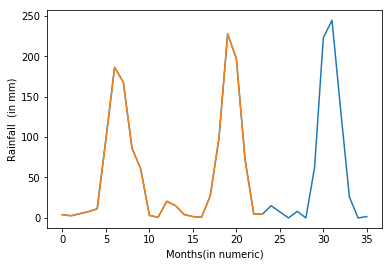

In [239]:
plt.plot(ypred1.ravel())

plt.plot(ytest.ravel())
plt.xlabel("Months(in numeric)")
plt.ylabel("Rainfall  (in mm)")

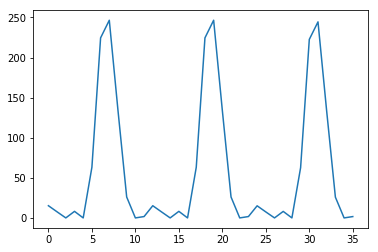

In [240]:
plt.plot(ypred.ravel())

In [241]:
ytest

array([[3.987, 2.66, 5.215, 7.774, 11.248, 97.27799999999999, 186.197,
        168.035, 86.39, 60.728, 3.1839999999999997, 0.631],
       [20.585, 15.14, 4.216, 1.642, 0.787, 27.354, 98.29, 227.646,
        197.192, 72.494, 4.789, 4.738]], dtype=object)

In [242]:
prediction=ypred[2]

In [243]:
prediction

array([ 15.100104 ,   7.471613 ,   0.       ,   8.123191 ,   0.       ,
        62.652264 , 222.6382   , 244.50795  , 132.94617  ,  25.880392 ,
         0.       ,   1.6711671], dtype=float32)

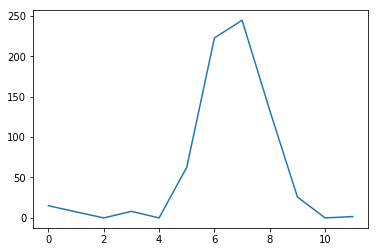

In [244]:
plt.plot(prediction)

In [245]:
sum1=abs(ypred[0]-ytest[0])
sum2=abs(ypred[1]-ytest[1])

In [246]:
ytest[0]

array([3.987, 2.66, 5.215, 7.774, 11.248, 97.27799999999999, 186.197,
       168.035, 86.39, 60.728, 3.1839999999999997, 0.631], dtype=object)

In [247]:
sum1.sum(),sum2.sum()

(270.4555729904175, 322.871399339676)

In [250]:
ypred[2]

array([ 15.100104 ,   7.471613 ,   0.       ,   8.123191 ,   0.       ,
        62.652264 , 222.6382   , 244.50795  , 132.94617  ,  25.880392 ,
         0.       ,   1.6711671], dtype=float32)

Text(0,0.5,'Rainfall (in mm)')

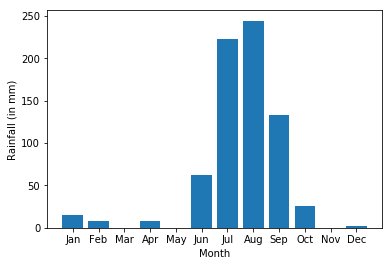

In [249]:
x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x,ypred[2])
plt.xlabel("Month")
plt.ylabel("Rainfall (in mm)")

In [262]:
from keras.layers import SimpleRNN,Dense,LSTM,Dropout,Activation,BatchNormalization

In [263]:
from keras.models import Sequential

In [264]:
from keras import optimizers

In [265]:
model=Sequential()
look_back=10

In [266]:
districtname='lucknow'
xtrain1,ytrain1,xtest1,ytest1=predictdistrict(districtname)

In [267]:
model.add(LSTM(1000,input_shape=(look_back,12)))
model.add(Dense(12))
model.add(Dropout(0.2,input_shape=(look_back,)))
model.add(Dense(1000))
model.add(Dense(12))
sgd = optimizers.rmsprop(lr=0.005)
model.compile(loss='mean_absolute_error',optimizer='sgd',metrics=['accuracy'])
model.fit(xtrain1,ytrain1,epochs=100,batch_size=4)

Epoch 1/100
80/80 [==============================] - 6s 74ms/step - loss: 76.1499 - acc: 0.1125
Epoch 2/100
80/80 [==============================] - 4s 55ms/step - loss: 61.5077 - acc: 0.5875
Epoch 3/100
80/80 [==============================] - 4s 55ms/step - loss: 35.3545 - acc: 0.5750
Epoch 4/100
80/80 [==============================] - 4s 55ms/step - loss: 33.4482 - acc: 0.6000
Epoch 5/100
80/80 [==============================] - 4s 56ms/step - loss: 33.5509 - acc: 0.5875
Epoch 6/100
80/80 [==============================] - 5s 61ms/step - loss: 32.0132 - acc: 0.5875
Epoch 7/100
80/80 [==============================] - 5s 66ms/step - loss: 32.7424 - acc: 0.5875
Epoch 8/100
80/80 [==============================] - 5s 61ms/step - loss: 32.1243 - acc: 0.5875
Epoch 9/100
80/80 [==============================] - 5s 62ms/step - loss: 33.0354 - acc: 0.5625
Epoch 10/100
80/80 [==============================] - 5s 60ms/step - loss: 33.6311 - acc: 0.5875
Epoch 11/100
80/80 [===================

In [268]:
ypredlstm=model.predict(xtest1)

In [269]:
model.evaluate(xtest1[:2],ytest1)

2/2 [==============================] - 0s 174ms/step


[27.377410888671875, 0.5]

In [270]:
for i in range(ypredlstm.shape[0]):
    for j in range(ypredlstm.shape[1]):
        if(ypredlstm[i][j]<0):
            ypredlstm[i][j]=0

In [271]:
import matplotlib.pyplot as plt

In [272]:
y_predlstm_flatten=ypredlstm.ravel()



In [273]:
y_test1_flatten=ytest1

In [274]:
ypredlstm1=np.vstack((y_test1_flatten,ypredlstm[2]))

Text(0,0.5,'Rainfall  (in mm)')

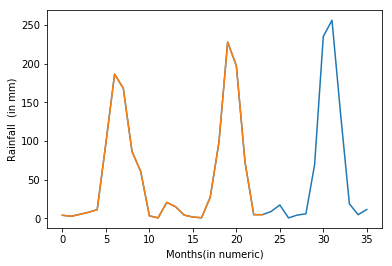

In [275]:
plt.plot(ypredlstm1.ravel())

plt.plot(ytest1.ravel())
plt.xlabel("Months(in numeric)")
plt.ylabel("Rainfall  (in mm)")

Text(0,0.5,'Rainfall (in mm)')

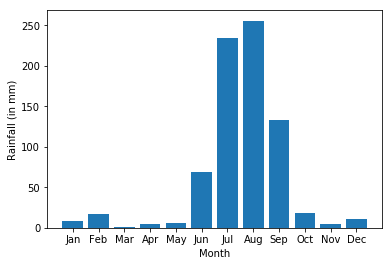

In [276]:
x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x,ypredlstm[2])
plt.xlabel("Month")
plt.ylabel("Rainfall (in mm)")